In [696]:
# Import the main data set
import pandas as pd

df1 = pd.read_csv("../Data/Hospital General Information.csv", encoding="ISO-8859-1")

# print(df1.head())

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [697]:
# Import the alternative data set

df2 = pd.read_csv("../Data/Complications and Deaths - Hospital.csv")

#print(df2.head())

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81804 entries, 0 to 81803
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           81804 non-null  int64 
 1   Hospital Name         81804 non-null  object
 2   Address               81804 non-null  object
 3   City                  81804 non-null  object
 4   State                 81804 non-null  object
 5   ZIP Code              81804 non-null  int64 
 6   County Name           81549 non-null  object
 7   Phone Number          81804 non-null  int64 
 8   Measure Name          81804 non-null  object
 9   Measure ID            81804 non-null  object
 10  Compared to National  81804 non-null  object
 11  Denominator           81804 non-null  object
 12  Score                 81804 non-null  object
 13  Lower Estimate        81804 non-null  object
 14  Higher Estimate       81804 non-null  object
 15  Footnote              33523 non-null

In [698]:
# I want to clean up the two sets and remove columns that are not going
# to be useful for this project first

cols_to_keep_1 = [
    'Provider ID',
    'State',
    'Hospital Type',
    'Hospital Ownership',
    'Emergency Services',
    'Meets criteria for meaningful use of EHRs',
    'Hospital overall rating',
]

cols_to_keep_2 = [
    'Provider ID',
    'State',
    'Measure ID',
    'Compared to National',
    'Score',
]

clean_df1 = df1[cols_to_keep_1]
clean_df2 = df2[cols_to_keep_2]

print(clean_df1.columns)
print(clean_df2.columns)

Index(['Provider ID', 'State', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating'],
      dtype='object')
Index(['Provider ID', 'State', 'Measure ID', 'Compared to National', 'Score'], dtype='object')


In [699]:
# Combine the two data frames into one

df_main = pd.merge(clean_df1, clean_df2, on=['Provider ID', 'State'], how='outer')

# print(df_main.head())
print(df_main.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81804 entries, 0 to 81803
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Provider ID                                81804 non-null  int64 
 1   State                                      81804 non-null  object
 2   Hospital Type                              81804 non-null  object
 3   Hospital Ownership                         81804 non-null  object
 4   Emergency Services                         81804 non-null  object
 5   Meets criteria for meaningful use of EHRs  79373 non-null  object
 6   Hospital overall rating                    81804 non-null  object
 7   Measure ID                                 81804 non-null  object
 8   Compared to National                       81804 non-null  object
 9   Score                                      81804 non-null  object
dtypes: int64(1), object(9)
memory usag

In [700]:
# Pull out the measure IDs that are HF mort,
# since this is what I want to study for this --> NOTE: this did not work lol, i will have to go back to doing the entire thing

hf_df = df_main

print(hf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81804 entries, 0 to 81803
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Provider ID                                81804 non-null  int64 
 1   State                                      81804 non-null  object
 2   Hospital Type                              81804 non-null  object
 3   Hospital Ownership                         81804 non-null  object
 4   Emergency Services                         81804 non-null  object
 5   Meets criteria for meaningful use of EHRs  79373 non-null  object
 6   Hospital overall rating                    81804 non-null  object
 7   Measure ID                                 81804 non-null  object
 8   Compared to National                       81804 non-null  object
 9   Score                                      81804 non-null  object
dtypes: int64(1), object(9)
memory usag

In [701]:
# import the encoder for states

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

hf_df = hf_df.copy() # Creating a copy to avoid warnings
hf_df['State'] = le.fit_transform(hf_df['State'])

print(hf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81804 entries, 0 to 81803
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Provider ID                                81804 non-null  int64 
 1   State                                      81804 non-null  int64 
 2   Hospital Type                              81804 non-null  object
 3   Hospital Ownership                         81804 non-null  object
 4   Emergency Services                         81804 non-null  object
 5   Meets criteria for meaningful use of EHRs  79373 non-null  object
 6   Hospital overall rating                    81804 non-null  object
 7   Measure ID                                 81804 non-null  object
 8   Compared to National                       81804 non-null  object
 9   Score                                      81804 non-null  object
dtypes: int64(2), object(8)
memory usag

In [702]:
# Encode other string values, finding how many
# uniques are in each column first for encoding
# method choice

print(hf_df['Hospital Ownership'].nunique()) # 10 unique --> LabelEncoder
print(hf_df['Emergency Services'].nunique()) # 2 unique --> LabelEncoder
print(hf_df['Meets criteria for meaningful use of EHRs'].nunique()) # 2 unique --> LabelEncoder
print(hf_df['Hospital overall rating'].nunique()) # 6 unique, already integers, just need to be converted
# Don't need to worry about Measure ID, the model won't need to look at this
print(hf_df['Compared to National'].nunique()) # 5 unique --> LabelEncoder
print(hf_df['Score'].nunique()) # 108, these should also be numbers


10
2
2
6
5
3218


In [703]:
# In the block below I try to convert these to floats
# and it does not work, so doing this as diagnostic

print(hf_df['Score'].unique())

['4.2' '13.4' '3.5' ... '126.16' '139.00' '132.82']


In [704]:
# Change Score to float, not sure why they also did
# NaN's as 'Not Available' so I will fix that

hf_df['Score'].replace('Not Available', pd.NA)
hf_df['Score'] = pd.to_numeric(hf_df['Score'], errors='coerce')

print(hf_df['Score'].head())

0     4.2
1    13.4
2     3.5
3     9.7
4    11.4
Name: Score, dtype: float64


In [705]:
print(hf_df['Hospital overall rating'].unique())

['3' '2' 'Not Available' '4' '5' '1']


In [706]:
# Same for 'Hospital overall rating'
# Replace 'Not Available' with pd.NA
hf_df['Hospital overall rating'] = hf_df['Hospital overall rating'].replace('Not Available', pd.NA)

# Drop rows with NaN values
hf_df = hf_df.dropna(subset=['Hospital overall rating'], axis=0)

# Ensure all values are numeric (convert to integer)
hf_df['Hospital overall rating'] = pd.to_numeric(hf_df['Hospital overall rating'], errors='coerce')

# Now convert to int64
hf_df['Hospital overall rating'] = hf_df['Hospital overall rating'].astype('int64')

hf_df.info()
print(hf_df['Hospital overall rating'].head())

<class 'pandas.core.frame.DataFrame'>
Index: 60639 entries, 0 to 81565
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Provider ID                                60639 non-null  int64  
 1   State                                      60639 non-null  int64  
 2   Hospital Type                              60639 non-null  object 
 3   Hospital Ownership                         60639 non-null  object 
 4   Emergency Services                         60639 non-null  object 
 5   Meets criteria for meaningful use of EHRs  60282 non-null  object 
 6   Hospital overall rating                    60639 non-null  int64  
 7   Measure ID                                 60639 non-null  object 
 8   Compared to National                       60639 non-null  object 
 9   Score                                      45684 non-null  float64
dtypes: float64(1), int64(3), ob

In [707]:
print(hf_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60639 entries, 0 to 81565
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Provider ID                                60639 non-null  int64  
 1   State                                      60639 non-null  int64  
 2   Hospital Type                              60639 non-null  object 
 3   Hospital Ownership                         60639 non-null  object 
 4   Emergency Services                         60639 non-null  object 
 5   Meets criteria for meaningful use of EHRs  60282 non-null  object 
 6   Hospital overall rating                    60639 non-null  int64  
 7   Measure ID                                 60639 non-null  object 
 8   Compared to National                       60639 non-null  object 
 9   Score                                      45684 non-null  float64
dtypes: float64(1), int64(3), ob

In [708]:
# LabelEncoder columns

hf_df['Hospital Type'] = le.fit_transform(hf_df['Hospital Type'])
hf_df['Hospital Ownership'] = le.fit_transform(hf_df['Hospital Ownership'])
hf_df['Emergency Services'] = le.fit_transform(hf_df['Emergency Services'])
hf_df['Meets criteria for meaningful use of EHRs'] = le.fit_transform(hf_df['Meets criteria for meaningful use of EHRs'])

print(hf_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60639 entries, 0 to 81565
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Provider ID                                60639 non-null  int64  
 1   State                                      60639 non-null  int64  
 2   Hospital Type                              60639 non-null  int64  
 3   Hospital Ownership                         60639 non-null  int64  
 4   Emergency Services                         60639 non-null  int64  
 5   Meets criteria for meaningful use of EHRs  60639 non-null  int64  
 6   Hospital overall rating                    60639 non-null  int64  
 7   Measure ID                                 60639 non-null  object 
 8   Compared to National                       60639 non-null  object 
 9   Score                                      45684 non-null  float64
dtypes: float64(1), int64(7), ob

In [709]:
# Print the last remaining string columns (except for measure ID)

# print(hf_df['Compared to National'].head())
print(hf_df['Compared to National'].unique())

['Worse than the National Rate' 'No Different than the National Rate'
 'Better than the National Rate' 'Not Available'
 'Number of Cases Too Small']


In [710]:
# Need to deal with the 'Compared to National' having more than 3 options
# I only want it to have better, worse, and no different than national

# Drop rows where 'Compared to National' is 'Number of Cases Too Small'
hf_df = hf_df[hf_df['Compared to National'] != 'Number of Cases Too Small']
hf_df = hf_df[hf_df['Compared to National'] != 'Not Available']
hf_df = hf_df[hf_df['Compared to National'] != 'No Different than the National Rate']

print(hf_df.info())
print(hf_df['Compared to National'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 2371 entries, 0 to 81021
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Provider ID                                2371 non-null   int64  
 1   State                                      2371 non-null   int64  
 2   Hospital Type                              2371 non-null   int64  
 3   Hospital Ownership                         2371 non-null   int64  
 4   Emergency Services                         2371 non-null   int64  
 5   Meets criteria for meaningful use of EHRs  2371 non-null   int64  
 6   Hospital overall rating                    2371 non-null   int64  
 7   Measure ID                                 2371 non-null   object 
 8   Compared to National                       2371 non-null   object 
 9   Score                                      2371 non-null   float64
dtypes: float64(1), int64(7), obj

In [711]:
# Encode compared to national

hf_df['Compared to National'] = le.fit_transform(hf_df['Compared to National'])

Cross-Val Accuracy: 78.90%
Accuracy: 0.79
AUC Score: 0.89
Sensitivity (Recall): 0.87


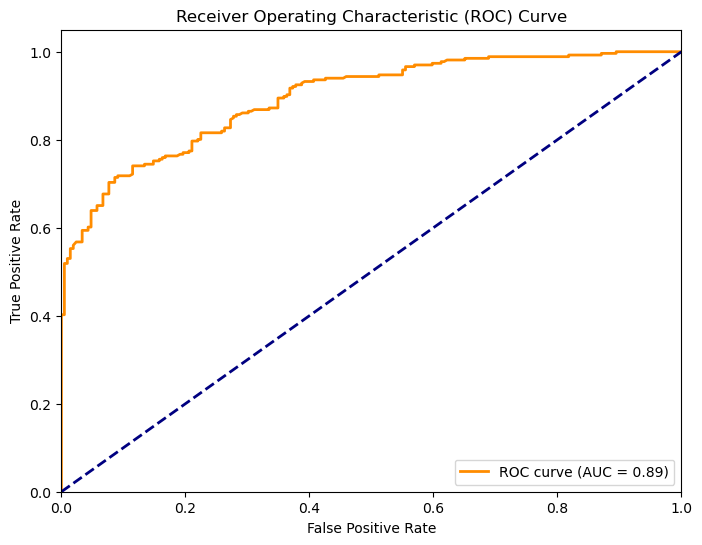

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       209
           1       0.78      0.87      0.82       266

    accuracy                           0.79       475
   macro avg       0.79      0.78      0.78       475
weighted avg       0.79      0.79      0.78       475



In [714]:
# Ready to begin the model creation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, recall_score, roc_auc_score
from sklearn.utils import shuffle

# y randomization
hf_df = shuffle(hf_df, random_state=42)

# separate features (X) and target (y)
X = hf_df.drop(columns=['Compared to National', 'Measure ID'])
y = hf_df['Compared to National']

# handle missing values
X = X.fillna(X.mode())
y = y.fillna(y.mode()[0])

# split train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest
model = RandomForestClassifier(max_depth=5, random_state=42)

# cross validation (5-fold):
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Val Accuracy: {cv_scores.mean() * 100:.2f}%')

# train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# predict and calculate ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"AUC Score: {roc_auc:.2f}")

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred)
print(f'Sensitivity (Recall): {sensitivity:.2f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))





Accuracy: 0.86
Sensitivity (Recall): 0.60
AUC Score: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       184
           1       0.93      0.83      0.88       291

    accuracy                           0.86       475
   macro avg       0.85      0.86      0.85       475
weighted avg       0.87      0.86      0.86       475



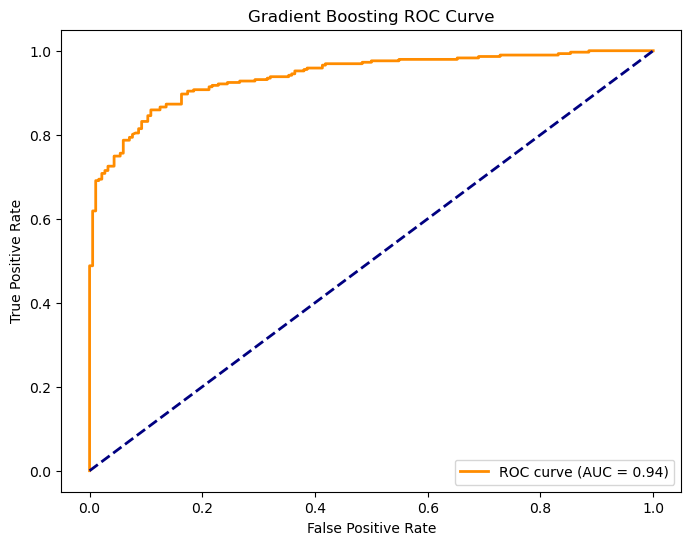

In [ ]:
# AUC is decent but accuracy can be improved so i want to try with gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# model
gb_model.fit(X_train, y_train)

# predictions
y_pred = gb_model.predict(X_test)
y_pred_prob = gb_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


print(f"Accuracy: {accuracy:.2f}")
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f"AUC Score: {roc_auc:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc="lower right")
plt.show()